In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#Loading data
df = pd.read_csv("C:/Users/keonyango/Sendy Case Study/Combined_data.csv")
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.00,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,20884,68,24.13,229
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,33143,273,24.92,123
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,96531,168,23.76,175
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,103546,95,24.53,42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      179867 non-null  object 
 1   order_id                179867 non-null  int64  
 2   dispatch_day            179867 non-null  int64  
 3   dispatch_day_of_week    179867 non-null  int64  
 4   dispatch_time           179867 non-null  object 
 5   client_id               179867 non-null  int64  
 6   client_type             179867 non-null  object 
 7   order_license_status    179867 non-null  int64  
 8   order_carrier_type      179867 non-null  int64  
 9   vendor_type             179867 non-null  object 
 10  rider_id                179867 non-null  int64  
 11  rider_license_status    179867 non-null  int64  
 12  rider_carrier_type      179867 non-null  int64  
 13  rider_amount            179867 non-null  int64  
 14  rider_lat           

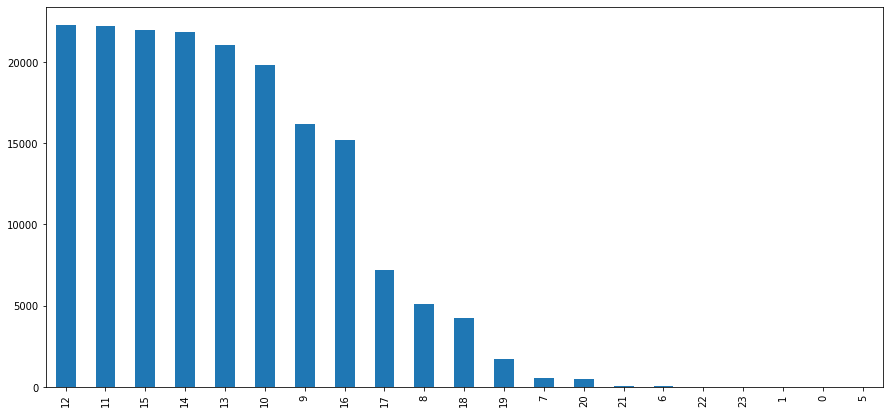

In [5]:
#Dispatch Time
#Convert time column to datetime
df['dispatch_time'] = pd.to_datetime(df['dispatch_time'])

#Extract Hour Column
df['dispatch_hour'] = df['dispatch_time'].dt.hour

#Hourly distribution of dispatches
df['dispatch_hour'].value_counts().plot(kind='bar',figsize=[15,7])
plt.show()

In [6]:
#Hours Category Function
def categorize_hour(x):
    """
        function to categorize hours into four categories early,day,evening and late
    """
    if x <= 8:
        return "early"
    elif x>=9 and x<=16:
        return "day"
    elif x>16 and x<=20:
        return "evening"
    else:
        return "late"
    
    
#Applying the function to the data
df["cat_hour"] = df["dispatch_hour"].apply(categorize_hour)

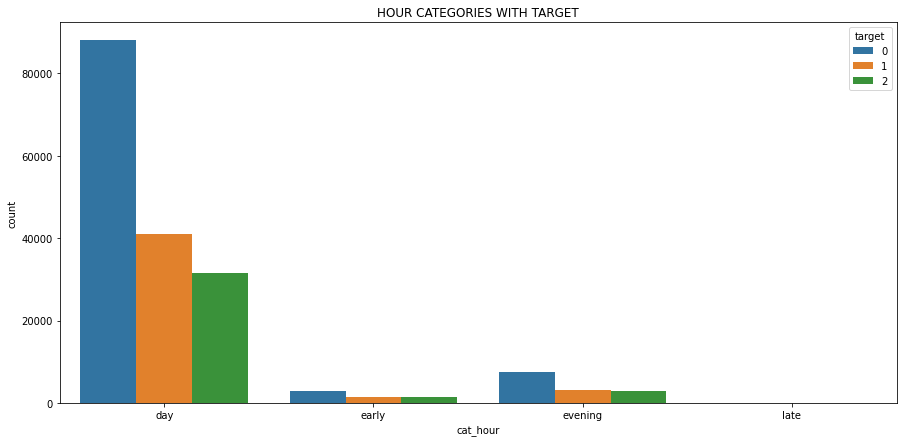

In [7]:
#Hours Category vs Target
plt.figure(figsize=(15,7))
sns.countplot(x = 'cat_hour', hue = 'target', data = df)
plt.title('HOUR CATEGORIES WITH TARGET')
plt.show()

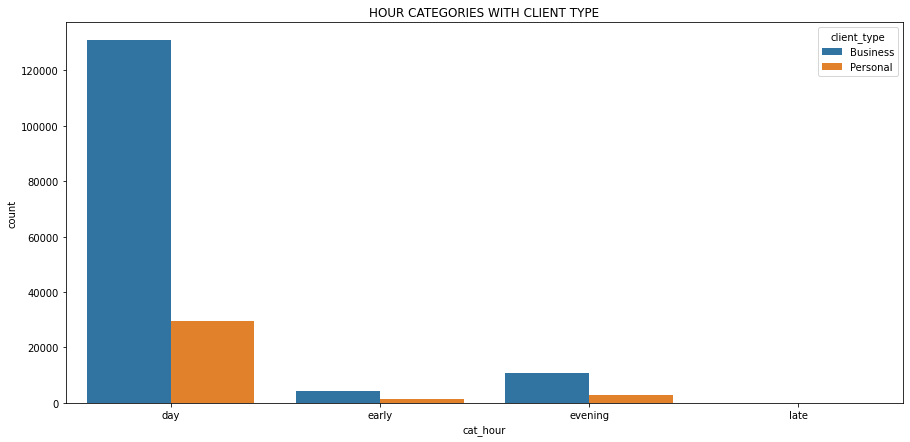

In [8]:
#Hours Category vs Client Type
plt.figure(figsize=(15,7))
sns.countplot(x = 'cat_hour', hue = 'client_type', data = df)
plt.title('HOUR CATEGORIES WITH CLIENT TYPE')
plt.show()

In [9]:
#Dispatch Distance
#Computing distance between coordinates in Kms

def calculate_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    
    R = 6371  
    
    lat = lat2 - lat1
    
    lng = lng2 - lng1
    
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    
    h = 2 * R * np.arcsin(np.sqrt(d))
    
    return h


#Apply the function
df['pickup_to_dropoff_distance'] = calculate_distance(df.pickup_lat, df.pickup_long, df.drop_off_lat, df.drop_off_long)
df['rider_to_dropoff_distance'] = calculate_distance(df.rider_lat, df.rider_long, df.drop_off_lat, df.drop_off_long)
df['rider_to_pickup_distance'] = calculate_distance(df.rider_lat, df.rider_long, df.pickup_lat, df.pickup_long)

In [10]:
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_hour,cat_hour,pickup_to_dropoff_distance,rider_to_dropoff_distance,rider_to_pickup_distance
0,ID_SCUW21PVAU,4435,27,6,2022-05-29 09:02:54,593630,Business,0,2,Bike,...,1,30153,11,10.00,1,9,day,14.426076,16.076117,1.746491
1,ID_2HA7X30JMN,32711,30,7,2022-05-29 13:01:37,837729,Personal,0,1,Bike,...,2,20884,68,24.13,229,13,day,13.126454,13.417651,0.394373
2,ID_IAJWDTBY6M,8712,14,2,2022-05-29 10:01:00,695129,Personal,0,2,Bike,...,1,33143,273,24.92,123,10,day,5.421337,7.224872,1.846564
3,ID_LKSVPNYMTR,44869,22,3,2022-05-29 14:11:16,1504660,Personal,0,2,Bike,...,2,96531,168,23.76,175,14,day,4.609312,4.626603,0.557483
4,ID_O7N8Y918YH,57590,27,5,2022-05-29 16:11:38,36869,Business,0,2,Bike,...,0,103546,95,24.53,42,16,day,1.554900,1.693870,0.954647


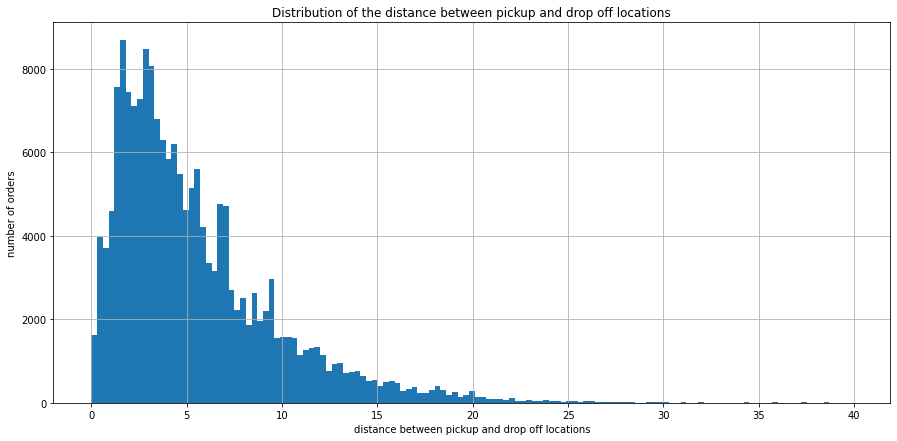

In [12]:
#Distribution of the distance between pickup and drop off locations

bin_values = np.arange(start=0, stop=40, step=0.3)
df['pickup_to_dropoff_distance'].hist(bins=bin_values, figsize=[15,7])
plt.ylabel("number of orders")
plt.xlabel("distance between pickup and drop off locations")
plt.title("Distribution of the distance between pickup and drop off locations")
plt.show()

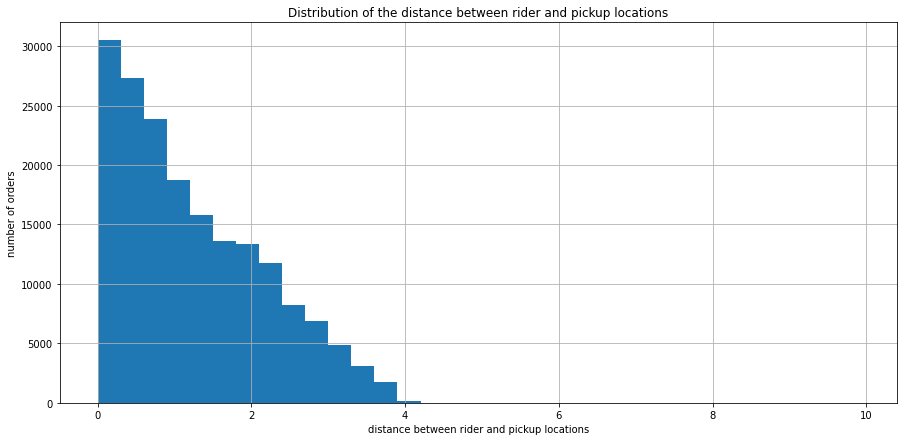

In [14]:
#Distribution of the distance between rider and pickup locations

bin_values = np.arange(start=0, stop=10, step=0.3)
df['rider_to_pickup_distance'].hist(bins=bin_values, figsize=[15,7])
plt.ylabel("number of orders")
plt.xlabel("distance between rider and pickup locations")
plt.title("Distribution of the distance between rider and pickup locations")
plt.show()

In [15]:
#Ratings
#Rating factor for a particular rider
df['RF_@rider'] = df['Number of Ratings'] * df['Average Partner Rating']

In [16]:
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_hour,cat_hour,pickup_to_dropoff_distance,rider_to_dropoff_distance,rider_to_pickup_distance,RF_@rider
0,ID_SCUW21PVAU,4435,27,6,2022-05-29 09:02:54,593630,Business,0,2,Bike,...,30153,11,10.00,1,9,day,14.426076,16.076117,1.746491,10.00
1,ID_2HA7X30JMN,32711,30,7,2022-05-29 13:01:37,837729,Personal,0,1,Bike,...,20884,68,24.13,229,13,day,13.126454,13.417651,0.394373,5525.77
2,ID_IAJWDTBY6M,8712,14,2,2022-05-29 10:01:00,695129,Personal,0,2,Bike,...,33143,273,24.92,123,10,day,5.421337,7.224872,1.846564,3065.16
3,ID_LKSVPNYMTR,44869,22,3,2022-05-29 14:11:16,1504660,Personal,0,2,Bike,...,96531,168,23.76,175,14,day,4.609312,4.626603,0.557483,4158.00
4,ID_O7N8Y918YH,57590,27,5,2022-05-29 16:11:38,36869,Business,0,2,Bike,...,103546,95,24.53,42,16,day,1.554900,1.693870,0.954647,1030.26


In [17]:
#Only relevant columns
#Remove some Columns

df.drop(["ID","order_id","dispatch_time","client_id","rider_id","Rider ID"], axis=1, inplace=True)

In [18]:
df.shape

(179867, 25)

In [19]:
df.head()

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,vendor_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,...,target,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_hour,cat_hour,pickup_to_dropoff_distance,rider_to_dropoff_distance,rider_to_pickup_distance,RF_@rider
0,27,6,Business,0,2,Bike,0,1,1080,-42.698343,...,1,11,10.00,1,9,day,14.426076,16.076117,1.746491,10.00
1,30,7,Personal,0,1,Bike,0,1,730,-42.787317,...,2,68,24.13,229,13,day,13.126454,13.417651,0.394373,5525.77
2,14,2,Personal,0,2,Bike,1,1,490,-42.749180,...,1,273,24.92,123,10,day,5.421337,7.224872,1.846564,3065.16
3,22,3,Personal,0,2,Bike,1,1,510,-42.836266,...,2,168,23.76,175,14,day,4.609312,4.626603,0.557483,4158.00
4,27,5,Business,0,2,Bike,0,0,400,-42.828195,...,0,95,24.53,42,16,day,1.554900,1.693870,0.954647,1030.26


In [20]:
#Save the data for Use later
df.to_csv("C:/Users/keonyango/Sendy Case Study/CleanF_data.csv",index=False)